<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2022 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example: 

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?

It may be tempting to just run a model on data without checking it. However, not doing basic checks can ruin your whole analysis and make your results invalid as well as mislead you in further analyses. There is no excuse for not plotting and checking that the data is as we expect and clean. In this exercise we do just that, check the validity of data and familiarize ourselves with a dataset, also discussing preprocessing and multi-dimensional plotting. 
 
------------

### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
Shadman Ishraq <br>
2205047 <br>
shishr@utu.fi  <br>
12.11.2022  <br>


#### General guidance for exercises 

-  You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Answer **all** questions (except the bonus if you do not want to attempt it), even if you can't get your script to fully work
- Write clear and easily readable code, include explanations of what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat.
- Don't leave it to the last moment! No feedback service during weekends.

### <font color = red> Packages needed for this exercise: </font>
- The exercise can be done without importing any extra packages, but you can import new ones but bear in mind that if you are importing many new packages, you may be complicating your answer. 

In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline


<div class="alert alert-block alert-warning">
    <h1><center> PLOTTING TUTORIAL </center></h1>

This small explanation of the matplotlib package aims to avoid confusion and help you avoid common mistakes and frustration. Matplotlib is an object-oriented plotting package with the benefit of giving the user a lot of control. The downside is that it can be confusing to new users. **If you are having problems with the plotting exercises, return to this tutorial as it explains the needed concepts to do the exercises!**

-----------

###  Figure and axes 


All plots in matplotlib are structured with the **<font color = dimgrey> figure </font>** and **<font color = blue> axes </font>** objects. 

- The **<font color = dimgrey> figure </font>** object is a container for all plotting elements (in other words, everything we see).  
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can be anywhere inside the figure and can even overlap. Position of axes is defined relative to the figure. 

The **<font color = blue> axes </font>** objects have the methods you will use to define most of your plots. For example axes.hist() is used to draw a histogram and axes.set_title() to give one axes a title. The name of the object can be a bit confusing as it does not refer to the axes in the way "x-axis" does but to the container of a single plot.


--------------
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise </font>. Below, we will create all figures and axes separately, but later on we will use a quicker way to do so. 

 This is not yet a part of the exercises themselves and you do not need to change anything ! 

In [3]:
#  --- Lets make some example data. ---
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

In [ ]:
### Create a figure ###
example_figure = plt.figure(figsize =(5,5)) #you give the size of the figure as a tuple of inches

### Create an axes separately and add it to the figure ###
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #the argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 

### Set labels and titles to the axes ###
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.scatter(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

###  Subplots: creating multiple axes and placing them in a grid on the figure 
An established convention of using matplotlib is to start plotting by calling the **<font color = blue> plt.subplots </font>** function, which automatically creates a figure and a determined number of axes in a grid inside it and automatically links the axes to the figure. Even when creating just one axes this is a often used way to start making a plot.

The most important arguments to **<font color = blue> plt.subplots </font>** are **nrows**, **ncols**, **figsize**, **sharex** and **sharey**
- **nrows** controls how many subplots there will be in the grid by row, **ncol** controls the number of columns
- **figsize** is a tuple e.g (1,5) which controls the size of the **<font color = dimgrey> figure </font>**, first is width and then height.
- sharex (True, False) tells matplotlib whether all axes in the grid should have same x-axis scale and ticks, sharey does the same for all y.

--------
Below an example on creating subplots is presented. There is also a template-like example on how to fill the subplots in a loop using the  **enumerate** function of python for indexing into the subplots. The function **enumerate()** will give you an additional int indexer over the object you are looping over. This indexer can be used to loop over the different subplot elements like the axes for each of the subplots.

**<font color = dimgrey> plt.tight_layout() </font>** is also a good command to know with subplots. It attempts to automatically arrange the different axes in a pretty way. It should be called after the plot is finished. 

In [ ]:
# ----- Create some random data for the example, 3 continuous numeric features and 3 binary -----
#dont worry about understanding the function, it creates lists and is shorthand for a for loop called list comprehension.
numeric_datas = [np.random.rand(10,2) for _ in range(0,3)] #this creates list of lists of linear data, using list comprehension
binary_datas = [(np.unique(np.random.randint(0, 2, size= 10), return_counts = True)[1]) for _ in range(0,3)] # create list of lists of samples of 0,1 like (co

In [ ]:
# Create figure with six axes in a 2*3 grid and set up titles --------------------------------------------------------
fig, axes = plt.subplots(2,3, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['scatter_plot_1', 'a second plot', 'yet a third plot' ]#some titles for the different axes
binary_plot_titles = ['coin_tosses1', 'tossing again', 'still tossing' ]#some titles for the different axes


# Enumerate the index into the axes, fill the first 3 columns of first row with scatterplots of numeric_datas --------
i = 0 # for indexing to the row of the axes [**i**, j]
for j, numeric_data in enumerate(numeric_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].scatter(x = numeric_data[:, 0], y = numeric_data[:, 1]) #plots are called on the axes
    axes[i, j].set_title(numeric_plot_titles[j]) #set a title for each axes
plt.tight_layout()


# Plot the binary data -----------------------------------------------------------------------------------------------
i = 1 # second row
for j, binary_data in enumerate(binary_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].bar(x = ["0","1"], height = binary_data) #make a barplot
    axes[i, j].set_title(binary_plot_titles[j]) #set a title for each axes
    axes[i, j].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()

####  <font color = maroon> Seaborn and matplotlib </font>
- Finally, it is good to know, that the popular Seaborn plotting library is based on matplotlib, and was designed to be an extension of it and to be more user-friendly and faster to use.  

- One tip in particular that might help new users with seaborn is that two kinnds of plotting functions: for figure-level and axes-level plots. Axes level plots can be put into subplots like matplotlib plots as you saw in the example above whereas figure-level plots are done completely with seaborn. (For more information on this see https://seaborn.pydata.org/tutorial/function_overview.html)

- For axes-level plots, the matplotlib-axes object is usually given to the seaborn plotting function as an argument. There is an example below.

In [ ]:
fig, axes = plt.subplots(2)

# make some data 
random_data_a = np.random.rand(30)
random_data_b = np.random.rand(100)

# print the data we are plotting
sns.histplot(data = random_data_a, ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data =  random_data_b, ax = axes[1]) # we make a seaborn plot and put it into one of the axes we created


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The exercise data depicts data gathered on hospital patients with and without cardiovascular disease, depicted by the target variable **_cardio_**, a common disease associated with a buildup of fatty deposits inside the arteries (blood vessels) of the heart. 
 
 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources: 
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days 
| sex | binary | Male/Female
| weight | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data*** 

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-maed code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [2]:
# --- READ IN DATA (no need to change) --------

data_path = "cardiovascular_disease_data_ex_1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run. 

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_Saving the feature names to a list or lists and using them to subset prevents typing errors and avoids repetition!_

In [16]:
# --- Your code here for 1a) 
#(1) printing the first five rorws

data.head(5)


,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol
0,19797,False,161,55,102,68,False,True,False,elevated
1,22571,True,178,68,120,70,False,False,False,normal
2,16621,True,169,69,120,80,False,True,False,normal
3,16688,False,156,77,120,80,False,True,False,normal
4,19498,True,170,98,130,80,True,True,True,elevated


In [3]:
#(2) naming the data types of the column according to numeric,binary & categorical.

numeric_features = []
binary_features = []
categorical_features = []

for column in data:
    if data.dtypes[column] == 'int': numeric_features.append(column)
    if data.dtypes[column] == 'boolean': binary_features.append(column)
    if data.dtypes[column] == 'category': categorical_features.append(column)

print(F'{numeric_features = }')
print(F'{binary_features = }')
print(F'{categorical_features = }')

numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_features = ['sex', 'smoke', 'active', 'cardio']
categorical_features = ['cholesterol']


_________
## <font color = dimgrey> 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It might be tempting to just use the data as is with a model, but it is very important to first check the data for possible mistakes as they can make all the conclusions you make based on your analysis misleading. One good routine for checking data quality is to first calculate statistical descriptives and then to plot the features to check if the values are realistic. 

  
-----------    
    
Some descriptive statistics don't really make sense for certain kinds of features. In pandas, like in many other packages, some functions work differently depending on the data type of a column. In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different. 

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [39]:
# --- 2a) Print the feature types of your dataset --- #

#printing the features
data.dtypes


age               int32
sex             boolean
height            int32
weight            int32
ap_hi             int32
ap_lo             int32
smoke           boolean
active          boolean
cardio          boolean
cholesterol    category
dtype: object

--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [5]:
# --- Your code for 2b) --- #

data.describe()

,age,height,weight,ap_hi,ap_lo
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened? 

<font color = red> ***--- I only got the output of quantitave variables. Sex,smoke,active,cardio & cholesterol these variables are qualitative. So, to find the features of these variables we need to know unique values,frequencies. Here, by choosing the categorical & binary observations in describe() function the features can be figured out. ---*** </font>


----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [14]:
# 2d) Your code here #

#calculating the descriptive features of the categorical variables. 

data[categorical_features].describe()

,cholesterol
count,210
unique,4
top,normal
freq,153


In [18]:
#calculating the descriptive features of the binary variables. 

data[binary_features].describe()

,sex,smoke,active,cardio
count,210,210,210,210
unique,2,2,2,2
top,False,False,True,False
freq,129,186,162,105


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv. 

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives. 

In [20]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in. 
wrongly_read_data.describe()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000


***2 e)*** 
- Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types? 

<font color = red> ***--- Above output shows that 0 & 1 are assigned for the qualitative variables because the minimum & maximum  value features are stating 0 & 1 for each of these variables. Hence, it can be said that the mean,standard deviation & quantile values are not appropiate. So, it would be proper if the frequency,count,unique these can be measured for the qualitative variables. ---*** </font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** 

Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


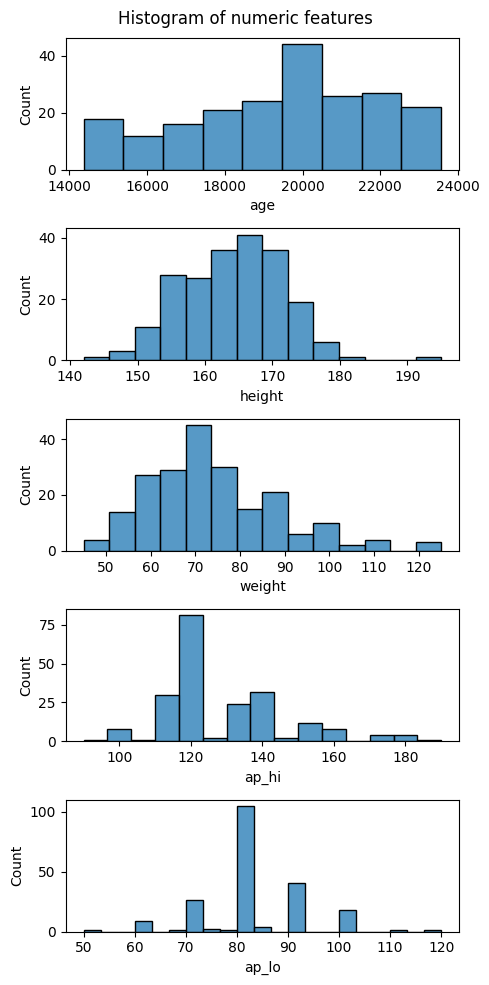

In [73]:
# --- Your code for 3a) here --- #

#plotting histogram accorrding to the tutorial by using plt.subplots()

fig, axes = plt.subplots(5,figsize=(5,10))

# printing the plotting data

sns.histplot(data = data['age'], ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data = data['height'], ax = axes[1])
sns.histplot(data = data['weight'], ax = axes[2])
sns.histplot(data = data['ap_hi'], ax = axes[3])
sns.histplot(data = data['ap_lo'], ax = axes[4])

fig.suptitle("Histogram of numeric features")
plt.tight_layout()


_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._ 

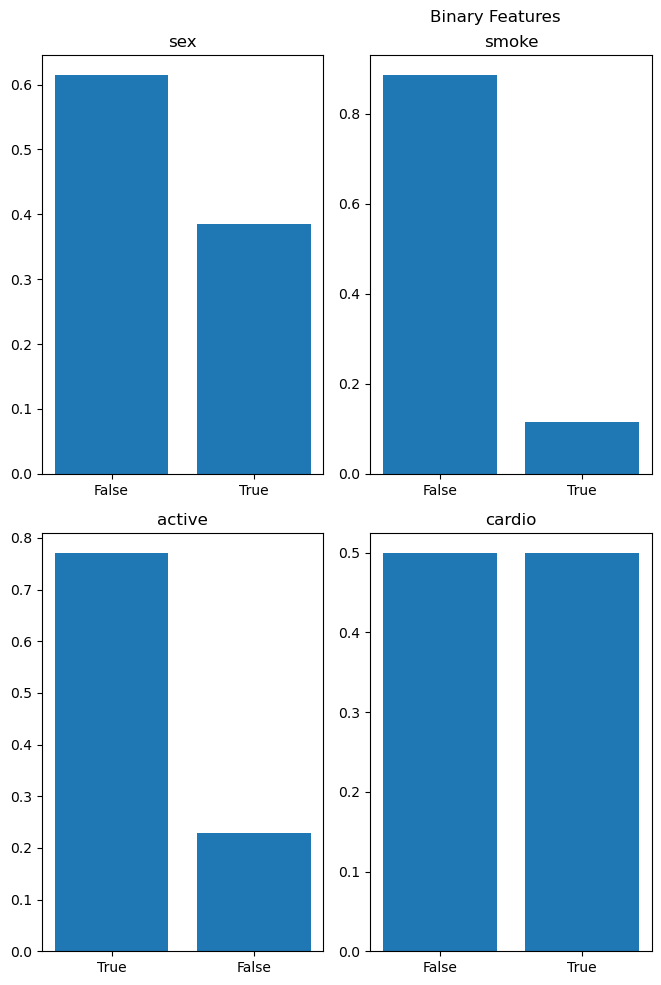

In [6]:
# --- Your code for 4a) here --- #
fig, axes = plt.subplots(2,3,figsize = (10,10))

for j, variable in enumerate(binary_features):
    values = data[variable].value_counts(normalize=True)
    x = data[variable].unique().astype(str)
    axes[j//2,j%2].bar(x=x, height=values)
    axes[j//2,j%2].set_title(variable)

fig.delaxes(axes[0,2])  
fig.delaxes(axes[1,2])    
fig.suptitle("Binary Features")
plt.tight_layout()

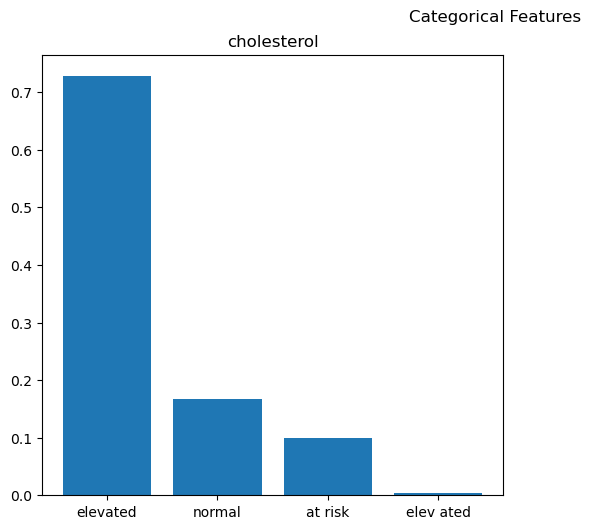

In [46]:
fig, axes = plt.subplots(2,2,figsize = (10,10))

for j, variable in enumerate(categorical_features):
    values = data[variable].value_counts(normalize=True)
    x = data[variable].unique().astype(str)
    axes[j//3,j%3].bar(x=x, height=values)
    axes[j//3,j%3].set_title(variable)

fig.delaxes(axes[0,1])  
fig.delaxes(axes[1,0]) 
fig.delaxes(axes[1,1]) 
fig.suptitle("Categorical Features")
plt.tight_layout()


**4 b)** 

Do you see something odd with one of the features? Fix it. 

_If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

In [81]:
### Your code for 4b) here ###

#the feature cholesterol of categorical_features showing a term elev ated.Which is an error & removing it by putting feature_name= chokesterol & category name to delete = elev ated.
data['cholesterol'] = data['cholesterol'].cat.remove_categories('elev ated')


-------------

## 5. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations. 

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both. 

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**5 a)** In this exercise we will use boxplots. Explain what a boxplot is and what information it gives you. 

<font color = red> --- To illustrate the summary of a group of data values with features like minimum, first quartile, median, third quartile, and maximum, a box plot is constructed. A box is produced in the box plot between the first and third quartiles, and a vertical line also exists that passes through the box at the median. Here, the y-axis displays the frequency distribution, while the x-axis indicates the data to be shown. --- </font>

**5 b)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [4]:
# --- Your code for 5b) here --- #
# use the variable name data_min_maxed

#creating a data min_max containing numeric features.
min_max = data[numeric_features].values

#storing the max-min numeric attributes [0,1] in a new data frame data_min_maxed.
data_min_maxed = pd.DataFrame(minmax_scale(min_max,feature_range=(0,1)), columns=numeric_features)
print(data_min_maxed)


          age    height  weight  ap_hi     ap_lo
0    0.590346  0.358491  0.1250   0.12  0.257143
1    0.891933  0.679245  0.2875   0.30  0.285714
2    0.245053  0.509434  0.3000   0.30  0.428571
3    0.252337  0.264151  0.4000   0.30  0.428571
4    0.557839  0.528302  0.6625   0.40  0.428571
..        ...       ...     ...    ...       ...
205  0.246032  0.301887  0.1250   0.30  0.428571
206  0.258208  0.528302  0.2875   0.20  0.285714
207  0.951294  0.283019  0.4125   0.10  0.142857
208  0.094477  0.207547  0.1250   0.30  0.428571
209  0.399652  0.566038  0.4125   0.50  0.571429

[210 rows x 5 columns]


**5 c)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [5]:
# Your code for 5c here --- #
import sklearn
#using standardscaler() function 
object = StandardScaler()

#standardization of the numeric attributes
data_standardized = pd.DataFrame(object.fit_transform(data[numeric_features]), columns=numeric_features)
print(data_standardized)

          age    height    weight     ap_hi     ap_lo
0    0.140926 -0.423185 -1.296193 -1.480325 -1.392016
1    1.285684  1.838449 -0.404407 -0.449822 -1.190484
2   -1.169727  0.641113 -0.335808 -0.449822 -0.182819
3   -1.142077 -1.088372  0.212983 -0.449822 -0.182819
4    0.017537  0.774151  1.653560  0.122679 -0.182819
..        ...       ...       ...       ...       ...
205 -1.166013 -0.822297 -1.296193 -0.449822 -0.182819
206 -1.119793  0.774151 -0.404407 -1.022324 -1.190484
207  1.511004 -0.955335  0.281582 -1.594825 -2.198148
208 -1.741280 -1.487484 -1.296193 -0.449822 -0.182819
209 -0.582904  1.040225  0.281582  0.695180  0.824845

[210 rows x 5 columns]


**5 d)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help. 

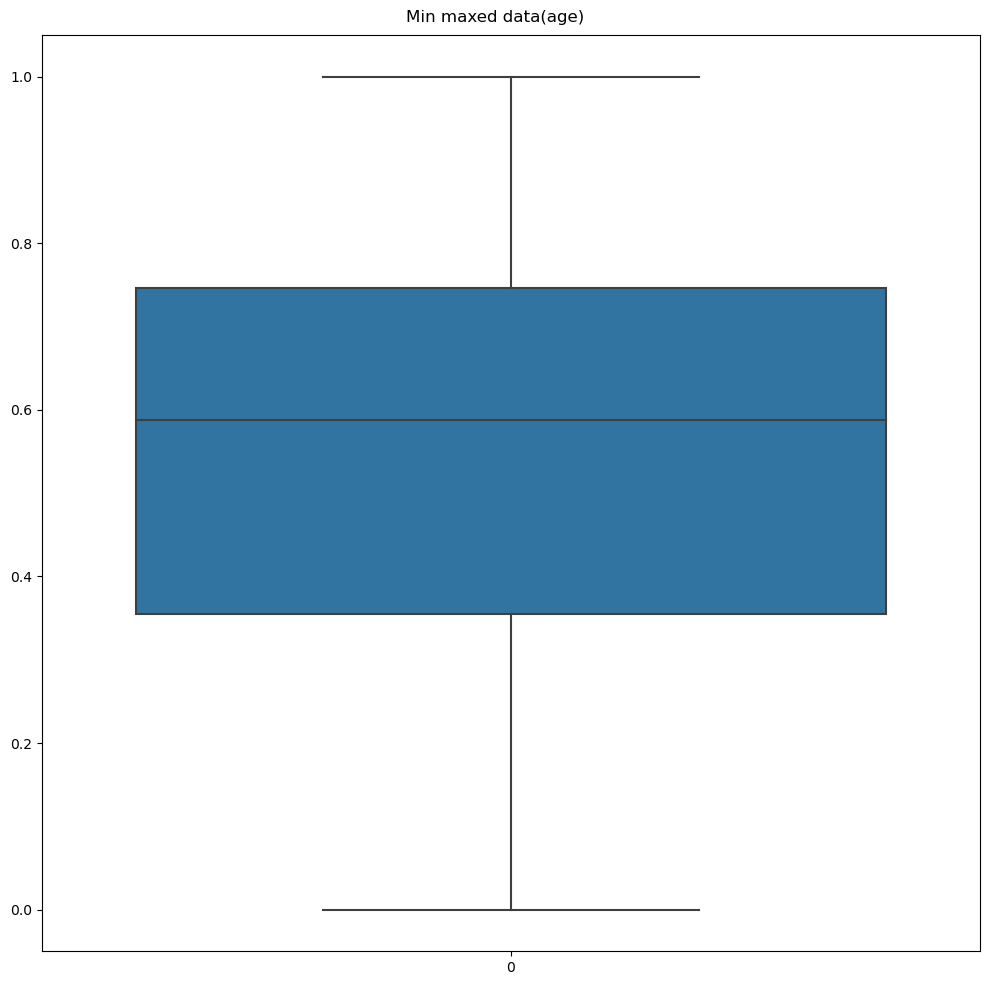

In [30]:
# Your code for 5d) here --- #

#creating the boxplot of data_min_max age feature
fig, axes = plt.subplots(1, figsize=(10,10))

sns.boxplot(data=data_min_maxed['age'])
 
fig.suptitle("Min maxed data(age)")
plt.tight_layout()


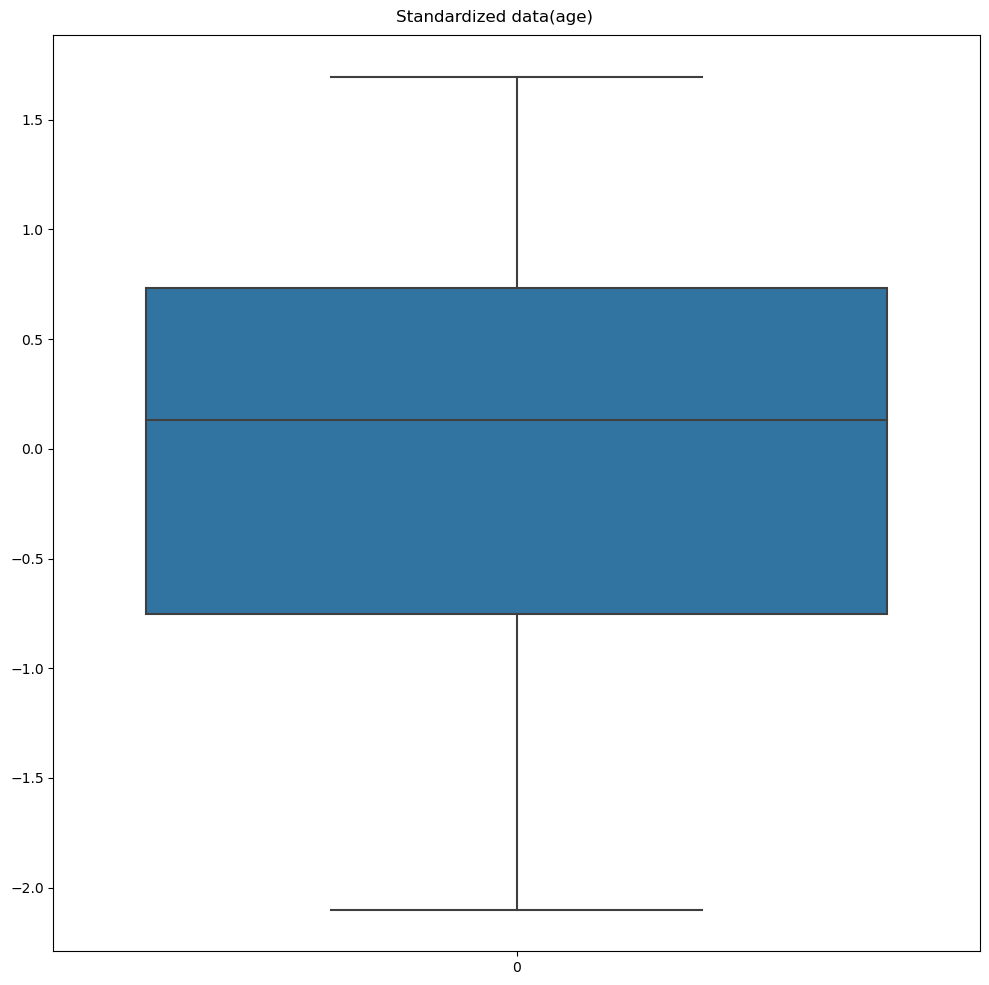

In [31]:
#creating the boxplot of data_standardized age feature
fig, axes = plt.subplots(1, figsize=(10,10))

sns.boxplot(data=data_standardized['age'])
 
fig.suptitle("Standardized data(age)")
plt.tight_layout()

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the 
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it. 

--------------------

***5e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [6]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [19]:
# --- Your code for 5e) --- 

# create age_w_outlier_minmaxed, keep the names the same
age_w_outlier_minmaxed =pd.DataFrame(minmax_scale(age_w_outlier))
print(age_w_outlier_minmaxed)

# create age_w_outlier_standardized
age_w_outlier_standardized = pd.DataFrame(object.fit_transform(age_w_outlier.values.reshape(-1,1)))[0] #added [0] to avoid the dimensional error
print(age_w_outlier_standardized)


            0
0    0.839078
1    0.957549
2    0.703438
3    0.706299
4    0.826308
..        ...
205  0.703822
206  0.708606
207  0.980867
208  0.644288
209  0.000000

[210 rows x 1 columns]
0      0.154476
1      1.158731
2     -0.995313
3     -0.971057
4      0.046230
         ...   
205   -0.992055
206   -0.951508
207    1.356396
208   -1.496716
209   -6.958212
Name: 0, Length: 210, dtype: float64


***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

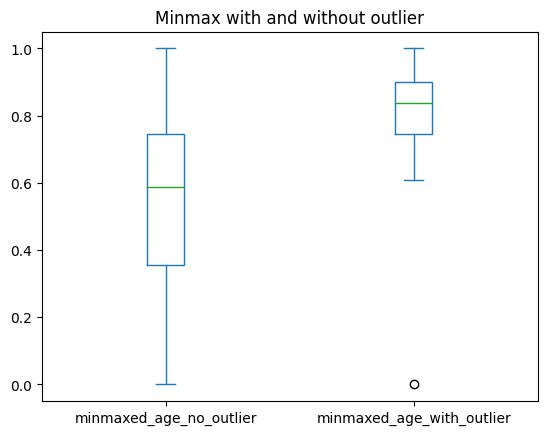

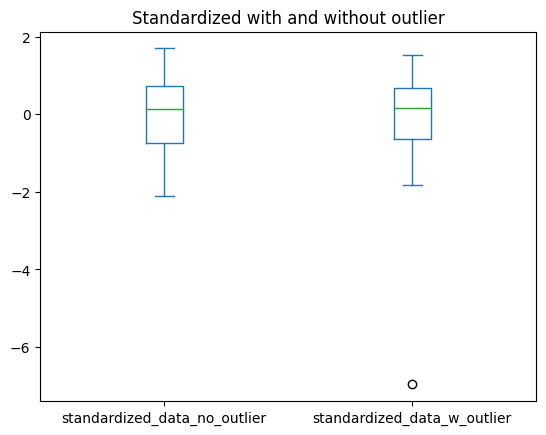

In [17]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age, 
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized. 
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age, 
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')


----------
**5 f) Look at the output of the above cell and answer the following**: 

1. Can you notice a difference between the two cases (min-maxed and standardized)? 
2. Can you say something about the difference of the effect of min-maxing and standardization?


<font color = red> ***1. Comparing to the standardized data boxplot, the min-maxed boxplot has more difference in case of with & without outlier.
 
<font color = red> 2.StandardScaler abides by the Standard Normal Distribution (SND). As a result, it adjusts the data to unit variance and sets mean = 0. All data characteristics are scaled by MinMaxScaler in the [0, 1] range or, if there are negative values in the dataset, in the [-1, 1] range.*** </font>

---------------
## 6. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other. 

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'cholesterol' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


**6 a)** One-hot-encode the cholesterol-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe. 

_tip: pandas has a function for this, google!_

In [85]:
# --- Your code for 6 a) here ---

#using the get_dummies() function in case of one-hot-encoded
data = pd.get_dummies(data, columns=['cholesterol'])
data.head(5)

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol_at risk,cholesterol_elevated,cholesterol_normal
0,19797,False,161,55,102,68,False,True,False,0,1,0
1,22571,True,178,68,120,70,False,False,False,0,0,1
2,16621,True,169,69,120,80,False,True,False,0,0,1
3,16688,False,156,77,120,80,False,True,False,0,0,1
4,19498,True,170,98,130,80,True,True,True,0,1,0


----------